In [1]:
import pandas as mulgul_engpd

mulgul_eng = mulgul_engpd.read_csv('mulgul_eng.csv',nrows=30000) # read English data
mulgul_eng

,text,label
0,comment expected barack obama members fyf fuky...,1
1,post votes hillary already,1
2,demonstrators gathered last night exercising c...,1
3,dozen politically active pastors came private ...,0
4,rs sarmat missile dubbed satan replace ss flie...,1
...,...,...
29995,washington reuters u president donald trump fa...,0
29996,thank goodness mandatory financial disclosures...,1
29997,washington reuters vice president mike pence t...,0
29998,share joe giambrone everything printed year do...,1


In [2]:
import pandas as mulgul_engpd

mulgul_ger = mulgul_engpd.read_csv('mulgul_german.csv',nrows=30000)
mulgul_ger

,Body,Fake
0,sondierungsgespr che union spd endeten komprom...,1
1,medizinisch offiziell best tigt milit r rztlic...,1
2,z he verhandlungen freien demokraten k nnen zu...,1
3,treibt immer sp t nacht herum joachim sauer be...,1
4,parteivorstand dr ckt nochmal auge nachdem noa...,1
...,...,...
29995,krisengebeutelte europ ische automobilmarkt ta...,0
29996,us kabelkonzern liberty global bieterrennen ka...,0
29997,angesichts tiefen rezession euro zone fasst ez...,0
29998,commerzbank fallen n chsten jahren voraussicht...,0


In [3]:
mulgul_eng['label'].value_counts()

0    15432
1    14568
Name: label, dtype: int64

In [4]:
mulgul_ger['Fake'].value_counts()

0    27960
1     2040
Name: Fake, dtype: int64

In [5]:
mulgul_engX = mulgul_eng.drop('label',axis=1)
mulgul_engX

,text
0,comment expected barack obama members fyf fuky...
1,post votes hillary already
2,demonstrators gathered last night exercising c...
3,dozen politically active pastors came private ...
4,rs sarmat missile dubbed satan replace ss flie...
...,...
29995,washington reuters u president donald trump fa...
29996,thank goodness mandatory financial disclosures...
29997,washington reuters vice president mike pence t...
29998,share joe giambrone everything printed year do...


In [6]:
mulgul_engY = mulgul_eng['label']
mulgul_engY

0        1
1        1
2        1
3        0
4        1
        ..
29995    0
29996    1
29997    0
29998    1
29999    0
Name: label, Length: 30000, dtype: int64

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer as mulgul_engcvt

mulgul_eng_AY = mulgul_engcvt(analyzer='char', ngram_range= (1,1))
mulgul_engX = mulgul_eng_AY.fit_transform(mulgul_eng['text'].values.astype('U')).toarray()

In [8]:
print(mulgul_engX)

[[0.57892077 0.2611502  0.0672667  ... 0.01424629 0.06197869 0.00488827]
 [0.39981329 0.39977331 0.         ... 0.         0.26913124 0.        ]
 [0.4510741  0.24806595 0.         ... 0.02669597 0.02277278 0.        ]
 ...
 [0.49078218 0.26848079 0.05059424 ... 0.00420957 0.04488672 0.        ]
 [0.52501742 0.28544968 0.04668153 ... 0.00699124 0.07222846 0.00799625]
 [0.51391005 0.24052959 0.0296293  ... 0.01294247 0.04416186 0.01973731]]


In [9]:
mulgul_gerX = mulgul_ger.drop('Fake',axis=1)
mulgul_gerX

,Body
0,sondierungsgespr che union spd endeten komprom...
1,medizinisch offiziell best tigt milit r rztlic...
2,z he verhandlungen freien demokraten k nnen zu...
3,treibt immer sp t nacht herum joachim sauer be...
4,parteivorstand dr ckt nochmal auge nachdem noa...
...,...
29995,krisengebeutelte europ ische automobilmarkt ta...
29996,us kabelkonzern liberty global bieterrennen ka...
29997,angesichts tiefen rezession euro zone fasst ez...
29998,commerzbank fallen n chsten jahren voraussicht...


In [10]:
mulgul_gerY = mulgul_ger['Fake']
mulgul_gerY

0        1
1        1
2        1
3        1
4        1
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: Fake, Length: 30000, dtype: int64

In [11]:
mulgul_ger_AY = mulgul_engcvt(analyzer='char', ngram_range= (1,1))
mulgul_gerX = mulgul_ger_AY.fit_transform(mulgul_ger['Body'].values.astype('U')).toarray()

In [12]:
print(mulgul_gerX)

[[0.43000932 0.20495771 0.04822856 ... 0.00622332 0.01132334 0.03620037]
 [0.51844098 0.16040163 0.05442561 ... 0.0133067  0.00807052 0.03440158]
 [0.53275549 0.1717627  0.03202569 ... 0.         0.         0.07284391]
 ...
 [0.47660857 0.19210243 0.07052332 ... 0.0037656  0.         0.09005003]
 [0.44799407 0.2315475  0.14598533 ... 0.         0.01418283 0.06045607]
 [0.48860776 0.19906242 0.06635856 ... 0.         0.         0.08452394]]


In [13]:
from imblearn.over_sampling import RandomOverSampler as mulgul_gerrmo
from collections import Counter as mulgul_gerctr


print('In starting mulgul_ger datashape %s' % mulgul_gerctr(mulgul_gerY))
Mdd= mulgul_gerrmo()
mulgul_gerX, mulgul_gerY = Mdd.fit_resample(mulgul_gerX, mulgul_gerY)
print('After applying random oversampling mulgul_ger datashape %s' % mulgul_gerctr(mulgul_gerY))

In starting mulgul_ger datashape Counter({0: 27960, 1: 2040})
After applying random oversampling mulgul_ger datashape Counter({1: 27960, 0: 27960})


In [14]:
from sklearn.model_selection import train_test_split as mulgul_engnst
from sklearn.metrics import classification_report as mulgul_engcla
from sklearn.metrics import confusion_matrix as mulgul_engcon
from sklearn.metrics import ConfusionMatrixDisplay as mulgul_engcma
import time as mulgul_engtim
from sklearn.model_selection import GridSearchCV as mulgul_enggri

In [15]:
ger_rast= 42
ger_tze=0.5
# {{{test,validation=50%,50%}}}
mulgul_gerXL, mulgul_gerXE, mulgul_gerYL, mulgul_gerYE = mulgul_engnst(mulgul_gerX, mulgul_gerY, test_size= ger_tze, random_state= ger_rast)

In [16]:
print(mulgul_gerXL.shape)
print(mulgul_gerXE.shape)

(27960, 27)
(27960, 27)


In [17]:
import warnings as mulgul_engww
mulgul_engww.filterwarnings("ignore")

#### ML algorithm

#### svm

In [18]:
from sklearn.svm import SVC as mulgul_engsvet

mulgul_Pa = {'kernel': ['sigmoid','linear','poly','rbf'],
            'gamma': ['scale','auto'],
            'C': [1.0,2.0,3.0,4.0,5.0]}

mulgul_Pa_Vbs = mulgul_engsvet(random_state= ger_rast)
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_engX[:100],mulgul_engY[:100])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_eng : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
{'C': 2.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score-mulgul_eng :  0.5700000000000001



 training duration : 46.198406457901 

              precision    recall  f1-score   support

           0       0.82      0.05      0.10     14006
           1       0.51      0.99      0.67     13954

    accuracy                           0.52     27960
   macro avg       0.67      0.52      0.39     27960
weighted avg       0.67      0.52      0.38     27960


 validation duration : 45.97819375991821 



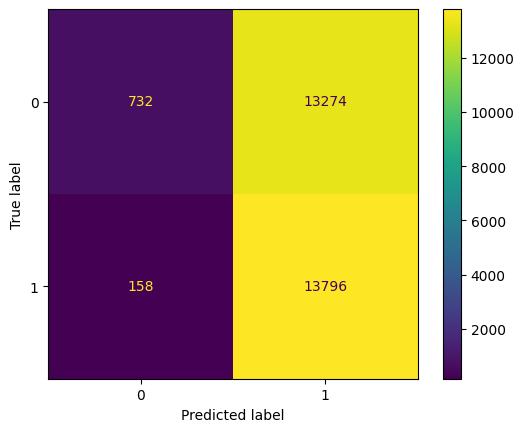

In [19]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll1 = mulgul_engsvet(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll1.fit(mulgul_engX,mulgul_engY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll1.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.84      0.05      0.10     13954
           1       0.51      0.99      0.67     14006

    accuracy                           0.52     27960
   macro avg       0.68      0.52      0.39     27960
weighted avg       0.68      0.52      0.39     27960


 testing duration : 49.16344904899597 



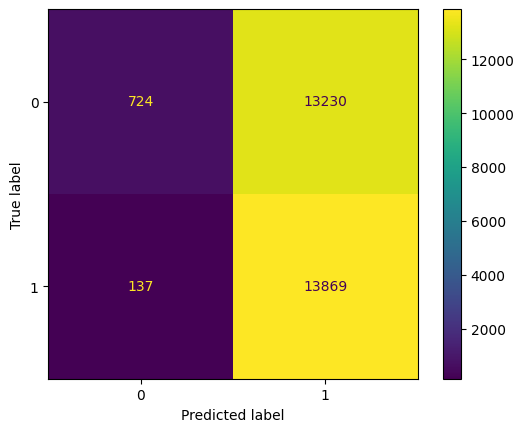

In [20]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll1.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Naive bayes

In [21]:
from sklearn.naive_bayes import GaussianNB as mulgulnvbs

mulgul_Pa = {'var_smoothing': [1e-9,1e-7,1e-5,1e-3,1e-1]}

mulgul_Pa_Vbs = mulgulnvbs()
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_engX[:3000],mulgul_engY[:3000])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_eng : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'var_smoothing': 1e-09}
Best Score-mulgul_eng :  0.5936666666666667



 training duration : 0.01657390594482422 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14006
           1       0.50      1.00      0.67     13954

    accuracy                           0.50     27960
   macro avg       0.25      0.50      0.33     27960
weighted avg       0.25      0.50      0.33     27960


 validation duration : 0.11810874938964844 



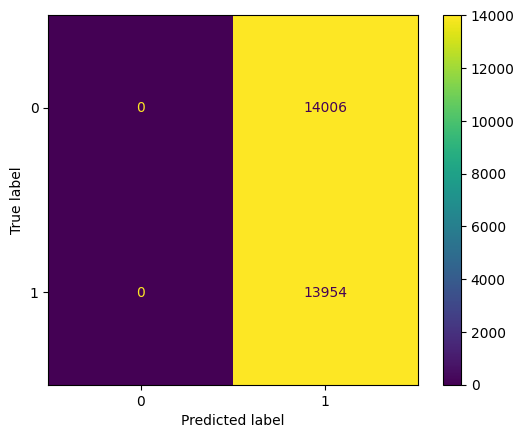

In [22]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll2 = mulgulnvbs(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll2.fit(mulgul_engX,mulgul_engY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll2.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13954
           1       0.50      1.00      0.67     14006

    accuracy                           0.50     27960
   macro avg       0.25      0.50      0.33     27960
weighted avg       0.25      0.50      0.33     27960


 testing duration : 0.11880731582641602 



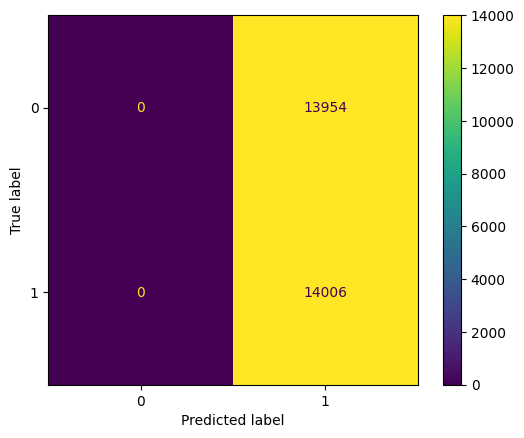

In [23]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll2.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier as mulguldesi

mulgul_Pa = {'max_features': ['sqrt','auto','log2'],
            'criterion': ['entropy','gini','log_loss'],
            'splitter': ['random','best']}

mulgul_Pa_Vbs = mulguldesi(random_state= ger_rast)
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_engX[:3000],mulgul_engY[:3000])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_eng : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
Best Score-mulgul_eng :  0.6063333333333334



 training duration : 0.30520105361938477 

              precision    recall  f1-score   support

           0       0.54      0.34      0.42     14006
           1       0.52      0.70      0.60     13954

    accuracy                           0.52     27960
   macro avg       0.53      0.52      0.51     27960
weighted avg       0.53      0.52      0.51     27960


 validation duration : 0.10717034339904785 



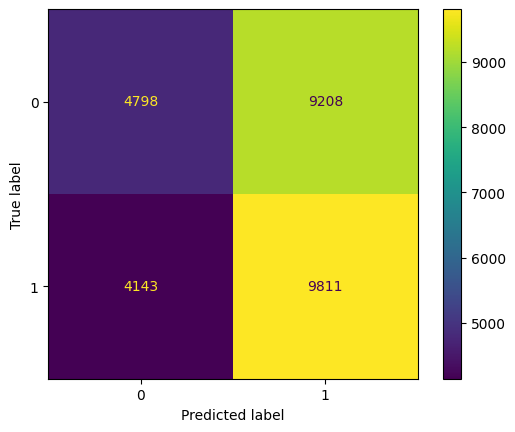

In [25]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll3 = mulguldesi(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll3.fit(mulgul_engX,mulgul_engY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll3.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.53      0.34      0.41     13954
           1       0.51      0.70      0.59     14006

    accuracy                           0.52     27960
   macro avg       0.52      0.52      0.50     27960
weighted avg       0.52      0.52      0.50     27960


 testing duration : 0.11091494560241699 



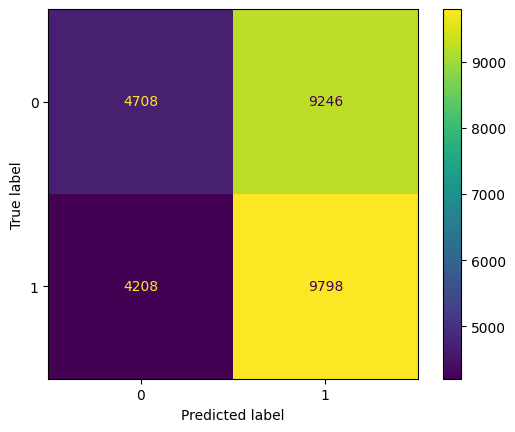

In [26]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll3.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier as mulgulromf

mulgul_Pa = {'criterion': ['log_loss','entropy','gini'],
            'n_estimators': [100,200,300,400,500],
            'max_features': ['log2','sqrt',None]}

mulgul_Pa_Vbs = mulgulromf(random_state= ger_rast)
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_engX[:500],mulgul_engY[:500])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_eng : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 45 candidates, totalling 90 fits
{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 200}
Best Score-mulgul_eng :  0.696



 training duration : 35.07415771484375 

              precision    recall  f1-score   support

           0       0.75      0.04      0.08     14006
           1       0.51      0.98      0.67     13954

    accuracy                           0.51     27960
   macro avg       0.63      0.51      0.38     27960
weighted avg       0.63      0.51      0.38     27960


 validation duration : 0.6994855403900146 



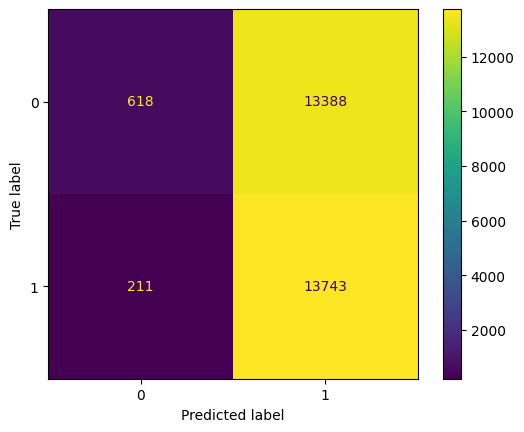

In [28]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll4 = mulgulromf(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll4.fit(mulgul_engX,mulgul_engY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll4.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.76      0.05      0.09     13954
           1       0.51      0.99      0.67     14006

    accuracy                           0.52     27960
   macro avg       0.63      0.52      0.38     27960
weighted avg       0.63      0.52      0.38     27960


 testing duration : 0.8324830532073975 



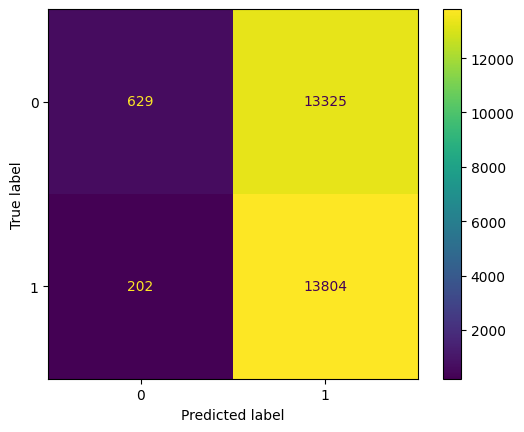

In [29]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll4.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier as mulgulkgh

mulgul_Pa = {'weights': ['distance','uniform'],
            'n_neighbors': [5,6,7,8,9],
            'algorithm': ['ball_tree','kd_tree','auto','brute']}

mulgul_Pa_Vbs = mulgulkgh()
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_engX[:3000],mulgul_engY[:3000])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_eng : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
{'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'distance'}
Best Score-mulgul_eng :  0.6413333333333333



 training duration : 0.07913827896118164 

              precision    recall  f1-score   support

           0       0.76      0.06      0.10     14006
           1       0.51      0.98      0.67     13954

    accuracy                           0.52     27960
   macro avg       0.63      0.52      0.39     27960
weighted avg       0.63      0.52      0.39     27960


 validation duration : 57.68951606750488 



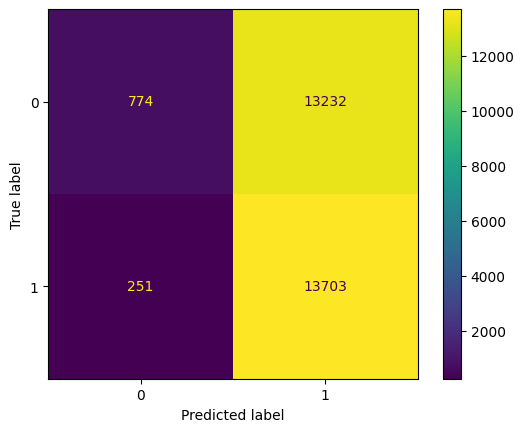

In [31]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll5 = mulgulkgh(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll5.fit(mulgul_engX,mulgul_engY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll5.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.74      0.05      0.10     13954
           1       0.51      0.98      0.67     14006

    accuracy                           0.52     27960
   macro avg       0.62      0.52      0.38     27960
weighted avg       0.62      0.52      0.38     27960


 testing duration : 42.65972948074341 



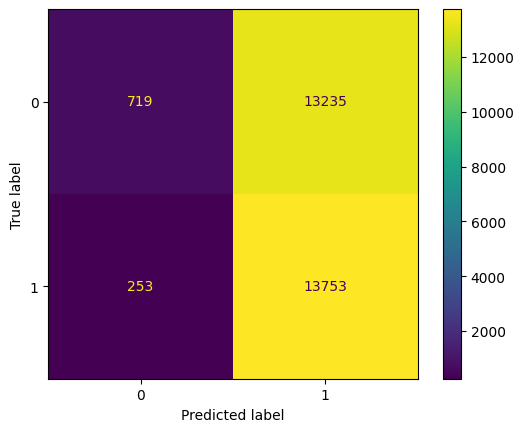

In [32]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll5.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")

#### MLP

In [33]:
from sklearn.neural_network import MLPClassifier as mulgulmlt

mulgul_Pa = {'solver': ['lbfgs','adam','sgd'],
            'learning_rate': ['constant','adaptive','invscaling'],
            'activation': ['tanh','relu','logistic','identity']}

mulgul_Pa_Vbs = mulgulmlt(random_state= ger_rast)
mulgul_Pa_Vbs = mulgul_enggri(mulgul_Pa_Vbs, mulgul_Pa,
                         cv=2,
                         verbose=1)
mulgul_Pa_Vbs.fit(mulgul_engX[:100],mulgul_engY[:100])

print(mulgul_Pa_Vbs.best_params_)
print("Best Score-mulgul_eng : ", mulgul_Pa_Vbs.best_score_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
{'activation': 'logistic', 'learning_rate': 'constant', 'solver': 'adam'}
Best Score-mulgul_eng :  0.5800000000000001



 training duration : 32.4563570022583 

              precision    recall  f1-score   support

           0       0.78      0.30      0.43     14006
           1       0.57      0.91      0.70     13954

    accuracy                           0.61     27960
   macro avg       0.67      0.61      0.57     27960
weighted avg       0.67      0.61      0.56     27960


 validation duration : 0.2346818447113037 



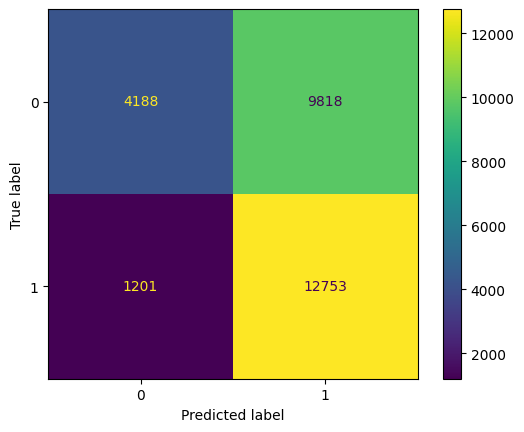

In [34]:
mul_pd1 = mulgul_engtim.time()
mulgul_Mll6 = mulgulmlt(**mulgul_Pa_Vbs.best_params_)
mulgul_Mll6.fit(mulgul_engX,mulgul_engY)
mul_pd2 = mulgul_engtim.time()
print("\n training duration :", mul_pd2-mul_pd1,"\n")

mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll6.predict(mulgul_gerXL)
print(mulgul_engcla(mulgul_gerYL,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYL,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n validation duration :", mul_pd2-mul_pd1,"\n")

              precision    recall  f1-score   support

           0       0.77      0.29      0.42     13954
           1       0.56      0.91      0.70     14006

    accuracy                           0.60     27960
   macro avg       0.66      0.60      0.56     27960
weighted avg       0.66      0.60      0.56     27960


 testing duration : 0.21749114990234375 



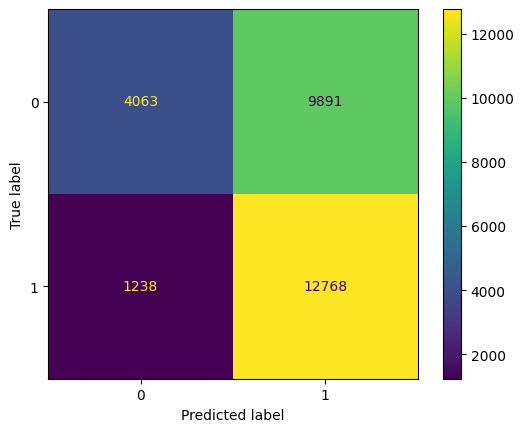

In [35]:
mul_pd1 = mulgul_engtim.time()

mulgul_Pcet = mulgul_Mll6.predict(mulgul_gerXE)
print(mulgul_engcla(mulgul_gerYE,mulgul_Pcet))
mul_pl = mulgul_engcon(mulgul_gerYE,mulgul_Pcet)
mul_wd = mulgul_engcma(confusion_matrix = mul_pl, display_labels = [0, 1])
mul_wd.plot()

mul_pd2 = mulgul_engtim.time()
print("\n testing duration :", mul_pd2-mul_pd1,"\n")